In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [170]:
df = pd.read_csv('house-prices.csv')
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


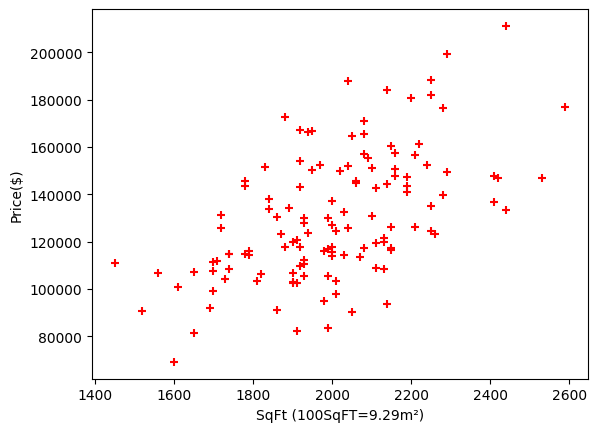

In [171]:
plt.xlabel('SqFt (100SqFT=9.29m²)') # x-axis label
plt.ylabel('Price($)') # y-axis label
plt.scatter(df.SqFt, df.Price, color='#ff0000', marker='+') # on prend les données de SqFt et Price pour faire le graphique


array([130361.50657665])

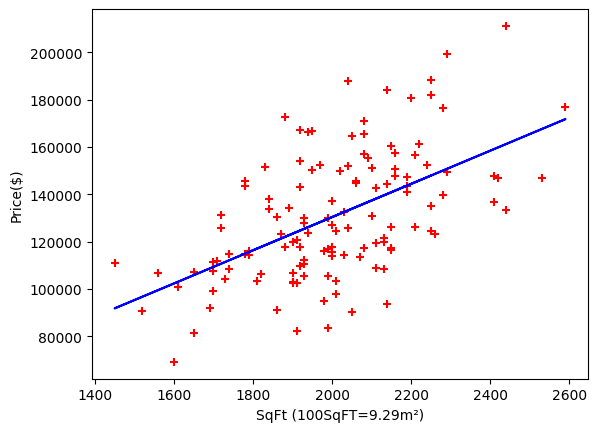

In [172]:
plt.xlabel('SqFt (100SqFT=9.29m²)') # x-axis label
plt.ylabel('Price($)') # y-axis label
plt.scatter(df.SqFt, df.Price, color='#ff0000', marker='+') # on prend les données de SqFt et Price pour faire le graphique

reg = LinearRegression() # on crée un objet de la classe LinearRegression
reg.fit(df[['SqFt']], df.Price) # on fait la régression linéaire avec les données de SqFt et Price

predicted_prices = reg.predict(df[['SqFt']]) # on prédit les prix de toutes les maisons
plt.plot(df.SqFt, predicted_prices, color='blue') # on fait le graphique de la régression linéaire

reg.predict(pd.DataFrame([[2000]], columns=['SqFt'])) # on prédit le prix d'une maison de 2000 SqFt



In [173]:
reg.coef_ # coefficient de la régression linéaire

array([70.22631824])

In [174]:
reg.intercept_ # intercept de la régression linéaire


-10091.129909123149

In [175]:
70.22631824 * 2000 + -10091.129909123149 # on vérifie le résultat de la prédiction
# coef * SqFt + intercept

130361.50657087684

In [176]:
df2 = pd.read_csv('50_Startups.csv')
X = df2.iloc[:,:-1] # on prend toutes les colonnes sauf la dernière
Y = df2.iloc[:,-1].values # on prend la dernière colonne
df2.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [177]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough') # on crée un objet de la classe ColumnTransformer le 3ème paramètre est la colonne à transformer
X = np.array(ct.fit_transform(X)) # on transforme les données de X en numérique

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.33) # on divise les données en 2 groupes, 80% pour l'entrainement et 20% pour le test

In [179]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # on crée un objet de la classe LinearRegression
regressor.fit(X_train, Y_train) # on fait la régression linéaire avec les données d'entrainement

LinearRegression()

In [183]:
Y_pred = regressor.predict(X_test) # on prédit les valeurs de Y avec les données de X_test
df2 = pd.DataFrame({'Real Values':Y_test, 'Predicted Values':Y_pred}) # on crée un dataframe avec les valeurs réelles et les valeurs prédites
df2

,Real Values,Predicted Values
0,132602.65,157940.313775
1,108552.04,110918.665544
2,96712.80,93495.568442
3,125370.37,130166.961022
4,96778.92,100779.445051
5,108733.99,112376.915182
6,191050.39,185464.916186
7,14681.40,50085.938890
8,124266.90,132862.115728
9,107404.34,106657.222484


In [181]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))) # on calcule l'erreur quadratique moyenne 


10395.08943473604
